In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

import statsmodels.api as sm

import pandas_profiling
%matplotlib inline

# Set seaborn plot style
sns.set_style("dark")
sns.set_context("paper")

## Reading data from .csv files

In [2]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

## Concatenating test and train data... we don't do any ML just yet

In [3]:
frames = [test, train]
df = pd.concat(frames)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Resetting index
df = df.reset_index()
df.drop(['index'], axis=1, inplace=True)

Let's have a first look at the imported dataframe

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


# 1. Data Inspection & cleaning

In [5]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

### Check for missing values

In [6]:
df.count()

id                                   129880
Gender                               129880
Customer Type                        129880
Age                                  129880
Type of Travel                       129880
Class                                129880
Flight Distance                      129880
Inflight wifi service                129880
Departure/Arrival time convenient    129880
Ease of Online booking               129880
Gate location                        129880
Food and drink                       129880
Online boarding                      129880
Seat comfort                         129880
Inflight entertainment               129880
On-board service                     129880
Leg room service                     129880
Baggage handling                     129880
Checkin service                      129880
Inflight service                     129880
Cleanliness                          129880
Departure Delay in Minutes           129880
Arrival Delay in Minutes        

Some rows were found, where 'Arrival Delay in Minutes' is nan, which ones are they?

In [7]:
df[df['Arrival Delay in Minutes'].isna()].head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,...,5,5,5,5,3,5,5,3,NaN,satisfied


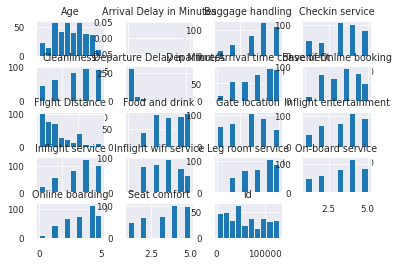

In [8]:
# Let's get a quick and rough glance on how the data are distributed, where Arrival Delay in minutes is NaN
_ = df[df['Arrival Delay in Minutes'].isna()].hist()

No siginificant pattern can be observed as to why these values are NaN in the 'Arrival Delay in Minutes' column. So lets drop them, since they're only 339 out of 129880

In [9]:
df = df[~df['Arrival Delay in Minutes'].isna()]

### Searching for duplicates

In [10]:
df[df.duplicated(keep=False)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


No duplicates found.

### Transforming categorical variables to dummies

In [11]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['Type of Travel'], drop_first=True)
df = pd.get_dummies(df, columns=['Customer Type'], drop_first=True)
df = pd.get_dummies(df, columns=['satisfaction'], drop_first=True)

# Mapping the class to values 0, 1, 2.
df['Class'] = df.Class.map({'Eco':0,
                            'Eco Plus':1,
                            'Business':2,
                           }
                          )

In [12]:
df = df.rename(columns={'Gender_Male':'Is Gender Male',
                        'Type of Travel_Personal Travel':'Is Travel Type Personal',
                        'Customer Type_disloyal Customer':'Is Customer Disloyal',
                        'satisfaction_satisfied':'Is satisfied',
                       },
              )

### Norming departure and arrival delay

In [13]:
# df['Departure Delay in Minutes'] = df['Departure Delay in Minutes']/df['Departure Delay in Minutes'].max()
# df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes']/df['Arrival Delay in Minutes'].max()

# 2. EDA

### General histograms

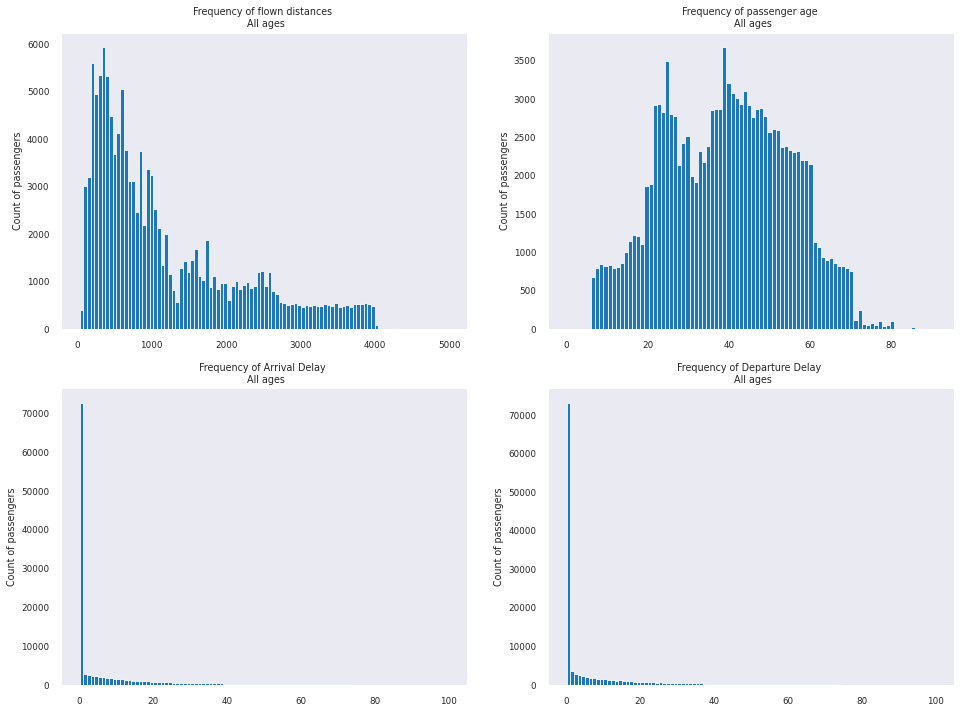

In [14]:
# Creating a function which plots Flight Distance, Age, Arrival Delay in Minutes and Departure Delay in Minutes
# in a 2 by 2 subplot. This might come in handy later when we want to plot the same, but for different age
# groups

def plot_fourstats(df, description_str):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

    _ = ax[0, 0].hist(df['Flight Distance'], bins=100)
    _ = ax[0, 1].hist(df['Age'], bins = 90, range=(0,91))
    _ = ax[1, 0].hist(df['Arrival Delay in Minutes'], bins=100, range=(0,100))
    _ = ax[1, 1].hist(df['Departure Delay in Minutes'], bins=100, range=(0,100))
    ax[0, 0].set_title(f'Frequency of flown distances \n {description_str}')
    ax[0, 1].set_title(f'Frequency of passenger age \n {description_str}')
    ax[1, 0].set_title(f'Frequency of Arrival Delay \n {description_str}')
    ax[1, 1].set_title(f'Frequency of Departure Delay \n {description_str}')

    _ = ax[0, 0].set_ylabel('Count of passengers')
    _ = ax[0, 1].set_ylabel('Count of passengers')
    _ = ax[1, 0].set_ylabel('Count of passengers')
    _ = ax[1, 1].set_ylabel('Count of passengers')

plot_fourstats(df, 'All ages')

### Age-group dependend analysis

Creating 5 different df's for age group's
* df_age1 : 0 - 18
* df_age2 : 19- 25
* df_age3 : 26 - 40
* df_age4 : 41 - 60
* df_age5 : 61 - 85

In [15]:
df_age1 = df[(df['Age'] >= 0) & (df['Age'] <= 18)]
df_age2 = df[(df['Age'] >= 19) & (df['Age'] <= 25)]
df_age3 = df[(df['Age'] >= 26) & (df['Age'] <= 40)]
df_age4 = df[(df['Age'] >= 41) & (df['Age'] <= 60)]
df_age5 = df[(df['Age'] >= 61) & (df['Age'] <= 85)]

### Stacked histogram Plot with the passenger frequency as a function of age. Econmy / Business / Economy Plus as stacked bars

In [16]:
df_age_class = df.groupby(['Age','Class']).agg({'id':'count'})
df_age_class = df_age_class.reset_index(level=0).reset_index(level=0)
df_age_class = df_age_class.pivot(columns='Class', values='id', index='Age')
df_age_class = df_age_class.reset_index()
df_age_class = df_age_class.rename(columns={0:'Eco',
                            1:'Eco Plus',
                            2: 'Business',
                            },
                   )

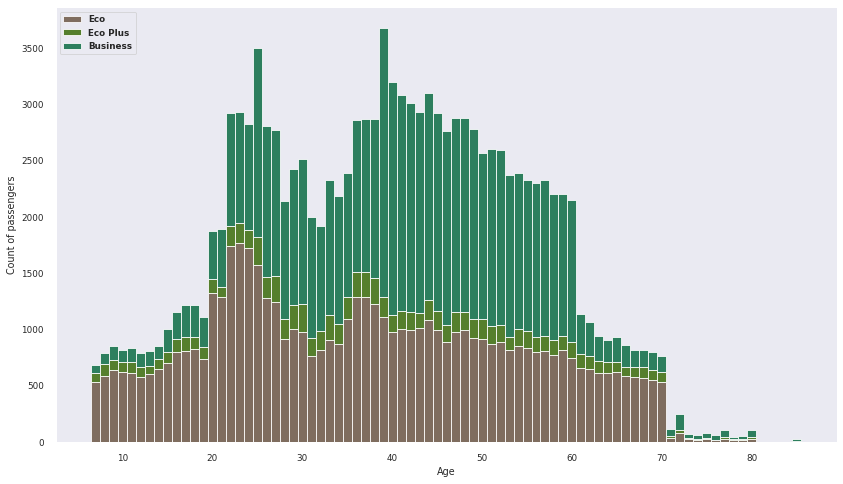

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = df_age_class['Eco']
bars2 = df_age_class['Eco Plus']
bars3 = df_age_class['Business']

classes_names = ['Eco', 'Eco Plus', 'Business']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = df_age_class['Age']
 
# Names of group and bar width
#names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)


plt.legend(classes_names,loc=2)
# Custom X axis
plt.ylabel('Count of passengers')
plt.xlabel("Age")
 
# Show graphic
plt.show()

### Why the sharp drop-off after 70?

Is there a change in flying behavior? Maybe older people don't fly that far anymore? Let's check that

In [18]:
df_age9 = df[(df['Age'] >= 70) & (df['Age'] <= 85)]
df_age10 = df[(df['Age'] >= 0) & (df['Age'] <= 69)]

print('Mean distance flown in km for passengers younger than 70: ', df_age9['Flight Distance'].mean())
print('standard deviation: ', df_age9['Flight Distance'].std())
print('Mean distance flown in km for passengers older than 70: ', df_age10['Flight Distance'].mean())
print('standard deviation: ', df_age10['Flight Distance'].std())

Mean distance flown in km for passengers younger than 70:  1073.8806488991888
standard deviation:  1000.0486392268732
Mean distance flown in km for passengers older than 70:  1191.7822340150751
standard deviation:  997.4383477624053


This is an inconclusive result - the means are too near to each other and the standard deviations don't allow for proper comparison.

Let's check the frequencies of flown distances for both age groups...

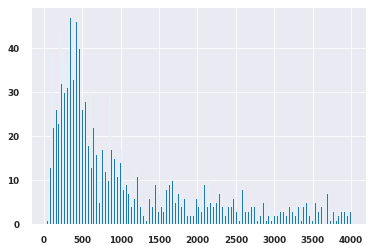

In [19]:
_= df_age9['Flight Distance'].hist(bins=200)

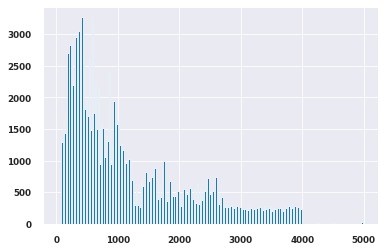

In [20]:
_ = df_age10['Flight Distance'].hist(bins=200)

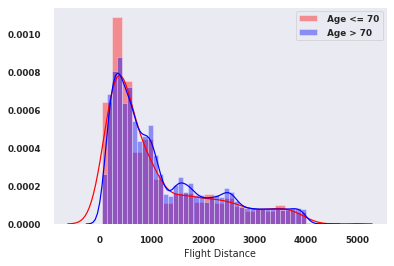

In [21]:
g = sns.distplot(df_age9['Flight Distance'], color="r", label=' Age <= 70')
g = sns.distplot(df_age10['Flight Distance'], color="b", label=' Age > 70')

plt.tick_params(
    axis='both',
    top=False,
)
_= plt.legend()

So we see, the probabilities for an individual to fly a certain distance are comparable between the age domains of older and younger than 70. So the reason of the sharp drop off after 70 must be a different one. It is most likely due to insurance reasons, which is confirmed by a quick online search.

Interestingly, for passengers older than 70, there seem to be significant peaks at certain distances, which could represent distances between major airports. One assumption is, that passengers older than 70 choose trips with significantly less stops, therefore the frequency of distances between major airports sticks out.

### Visualizing Distance-age-satisfaction relationship

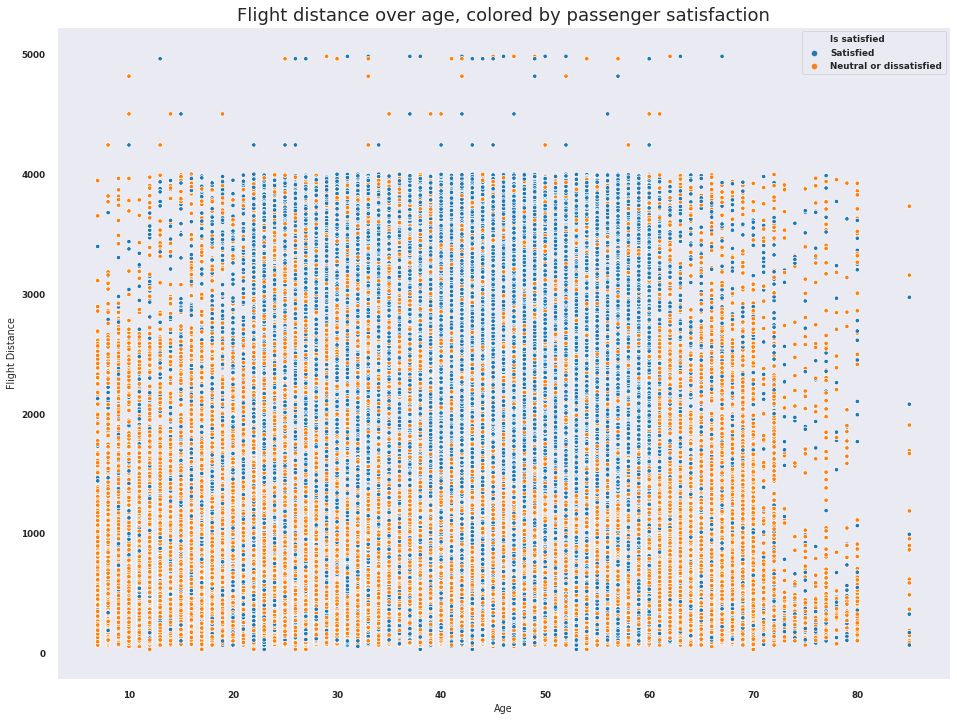

In [22]:
df_piv_1 = df.drop([x for x in df.columns.to_list() if not x in ['Flight Distance', 'Age','Is satisfied']], axis=1)

fig, ax = plt.subplots(figsize=(16,12))

df_piv_1['Is satisfied'] = df_piv_1['Is satisfied'].map({0:'Neutral or dissatisfied', 1:'Satisfied'})

sns.scatterplot(data=df_piv_1, x='Age', y='Flight Distance', hue='Is satisfied', ax=ax, s=20)
ax.set_title('Flight distance over age, colored by passenger satisfaction', fontsize=18)
plt.show()

* Domestic flights rarely go further than the rough distance between the West and the East coast of 4000km
* Between the ages of 15 and 65, if one looks at the satisfaction over flight distance, one can make out a slight overweight for longer flights

In [23]:
df

,id,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Is Gender Male,Is Travel Type Personal,Is Customer Disloyal,Is satisfied
0,19556,52,0,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,0,0,0,1
1,90035,36,2,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,0,0,0,1
2,12360,20,0,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,1,0,1,0
3,77959,44,2,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,1,0,0,1
4,36875,49,0,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,23,0,192,2,1,2,3,2,2,...,4,2,3,2,3,0.0,0,0,1,0
129876,73097,49,2,2347,4,4,4,4,2,4,...,5,5,5,4,0,0.0,1,0,0,1
129877,68825,30,2,1995,1,1,1,3,4,1,...,4,5,5,4,7,14.0,1,0,1,0
129878,54173,22,0,1000,1,1,1,5,1,1,...,1,5,4,1,0,0.0,0,0,1,0


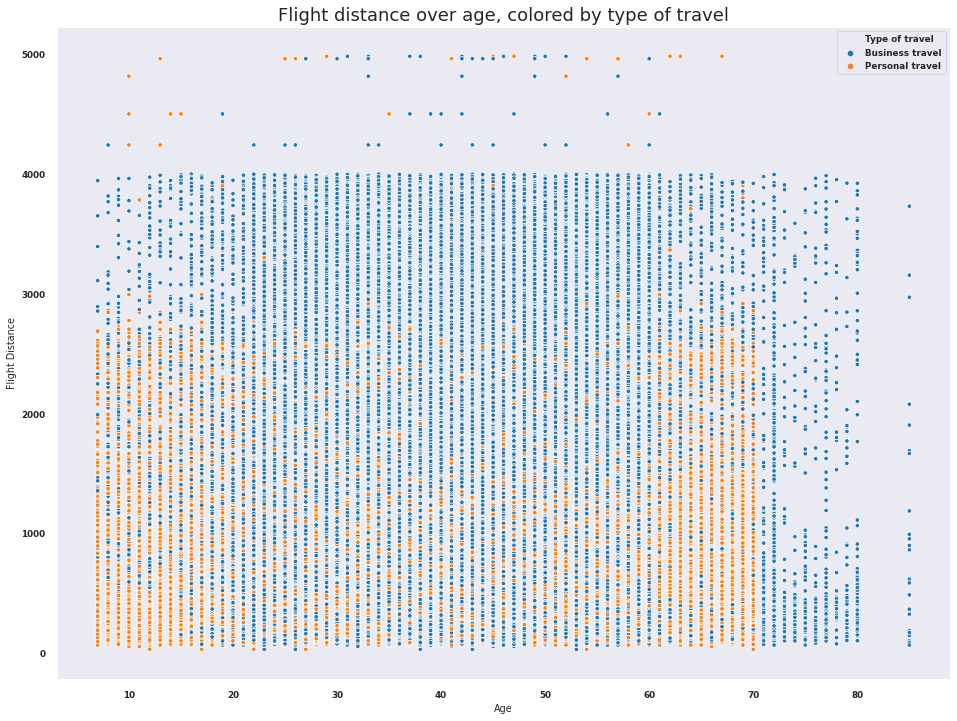

In [24]:
df_piv_2 = df.drop([x for x in df.columns.to_list() if not x in ['Flight Distance', 'Age', 'Is Travel Type Personal']], axis=1)

df_piv_2['Is Travel Type Personal'] = df_piv_2['Is Travel Type Personal'].map({1: 'Personal travel', 0: 'Business travel'})
df_piv_2 = df_piv_2.rename(columns={'Is Travel Type Personal':'Type of travel'})

fig, ax = plt.subplots(figsize=(16,12))

sns.scatterplot(data=df_piv_2, x='Age', y='Flight Distance', hue='Type of travel', ax=ax, s=20)
ax.set_title('Flight distance over age, colored by type of travel', fontsize=18)
plt.show()

* As expected, business travels occur most oftern within the age domain of the general workforce (age 20 to 60)
* The retirement age of around 60 is visible, where personal travels start to overweigh.
* Travel distances of over around 2800km are mostly business travels
* Interestingly, traveling passengers at the age of 70 and older are travelling mostly for business reasons

### Count of Ratings for different category

Let's now look at the number of ratings within the different categories, and let's also include gender.

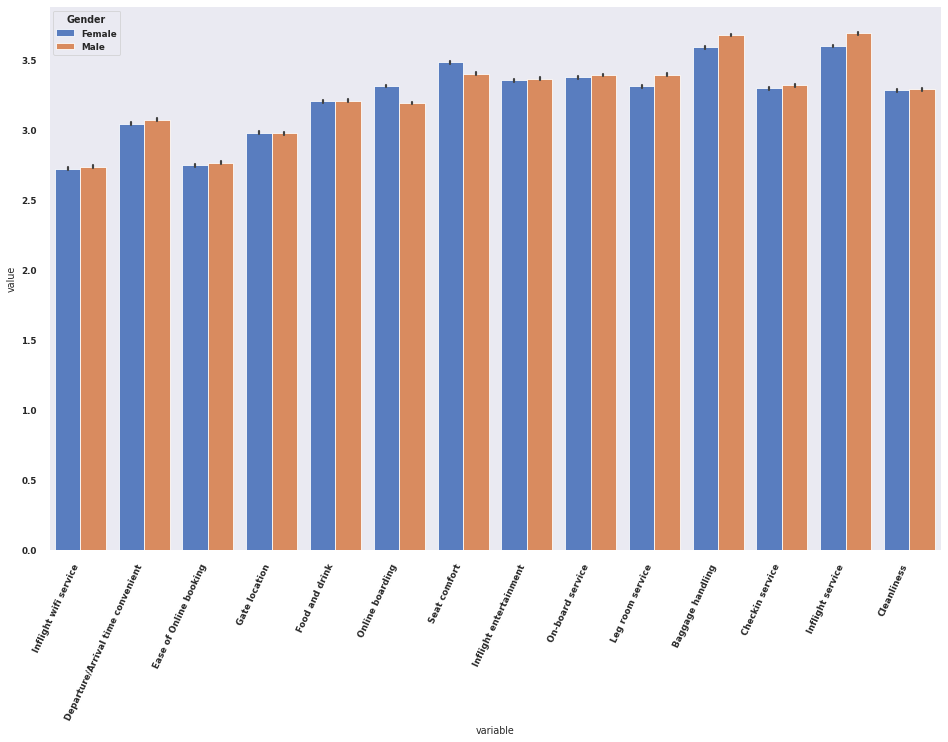

In [25]:
df_piv = df.drop(['id',
                  'Flight Distance',
                  'Departure Delay in Minutes',
                  'Arrival Delay in Minutes',
                  'Age',
                  'Is Travel Type Personal',
                  'Is Customer Disloyal',
                  'Is satisfied',
                  'Class',
                  ],
                 axis=1,
                )

data=pd.melt(df_piv, id_vars=['Is Gender Male'])
data['Is Gender Male'] = data['Is Gender Male'].map({1: 'Male', 0:'Female'})
data = data.rename(columns={'Is Gender Male': 'Gender'})

fig, ax = plt.subplots(figsize=(16,10))

sns.barplot(x="variable",
            y="value",
            hue="Gender",
            data=data,
            palette="muted",
            ax=ax,
            estimator=np.mean,
           )
_ = ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=65, horizontalalignment='right')

No significant difference in rating with respect to gender is visible

### Ratings in detail for every category

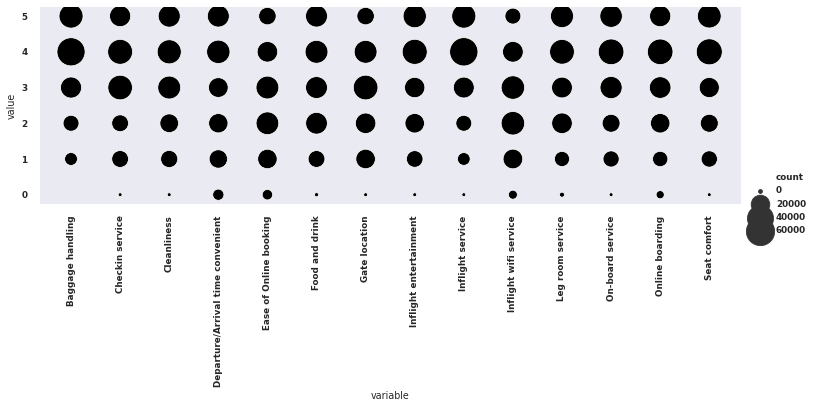

In [26]:
df_rating_count = data.groupby(['variable', 'value']).agg({'value':'count'})
df_rating_count = df_rating_count.reset_index(level=0).rename(columns={'value':'count'}).reset_index(level=0)

g = sns.relplot(x="variable",
            y="value",
            size="count",
            sizes=(15, 800),
            data=df_rating_count,
            color='black',
            height=3.5,
            aspect=3,
           )
g.set_xticklabels(rotation=90)

Let's use a more informative way of plotting and plot these as a heatmap

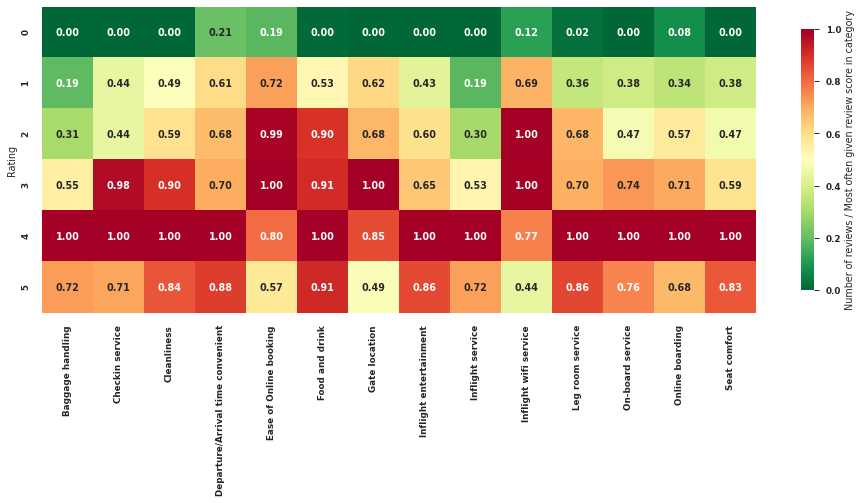

In [27]:
df_rating_pvt = df_rating_count.pivot(values='count', columns='variable', index='value').fillna(0).astype(int)

df_rating_pvt = df_rating_pvt / df_rating_pvt.max()

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df_rating_pvt,
                 square=True,
                 cmap='RdYlGn_r',
                 annot=True,
                 fmt='.2f',
                 cbar=True,
                 cbar_kws={'shrink':.4,
                          'label': 'Number of reviews / Most often given review score in category',
                          'format': '%.1f',
                          }
                    )

_ = ax.set_ylabel('Rating')
_ = ax.set_xlabel('')

...and again relative to the most given **global** score

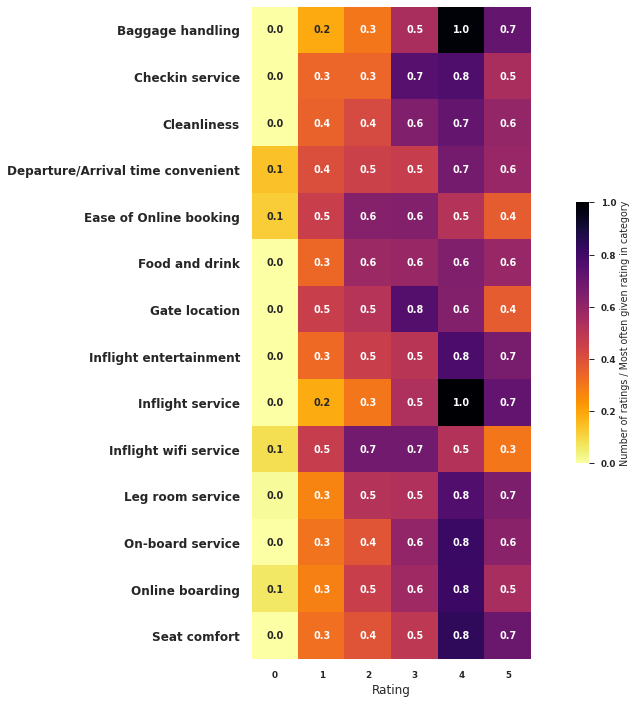

In [28]:
df_rating_pvt = df_rating_count.pivot(values='count', columns='variable', index='value').fillna(0).astype(int)

df_rating_pvt = df_rating_pvt / df_rating_pvt.max().max()

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df_rating_pvt.T,
                 square=True,
                 cmap='inferno_r',
                 annot=True,
                 fmt='.1f',
                 cbar=True,
                 cbar_kws={'shrink':.4,
                          'label': 'Number of ratings / Most often given rating in category',
                          'format': '%.1f',
                          },
                )

ax.set_xlabel('Rating', fontsize=12)    
ax.set_ylabel('')
_ = plt.yticks(rotation=0, fontsize=12)

Let's plot this heatmap with the total numbers

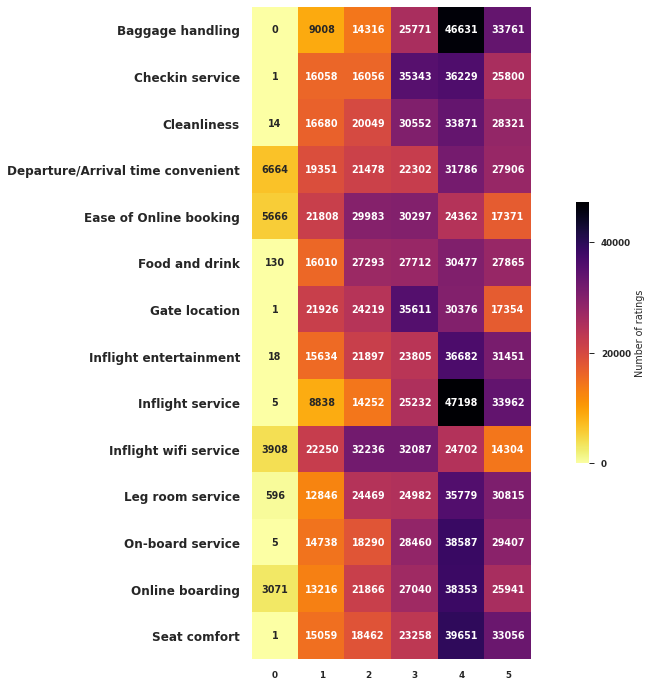

In [57]:
df_rating_pvt = df_rating_count.pivot(values='count', columns='variable', index='value').fillna(0).astype(int)

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df_rating_pvt.T,
                 square=True,
                 cmap='inferno_r',
                 annot=True,
                 fmt='d',
                 cbar=True,                 
                 cbar_kws={'shrink': .4,
                           'label': 'Number of ratings',
                           'ticks': [0 , 20000, 40000]
                          },
                    )

ax.set_xlabel('')
#ax.set_xticklabels([])
ax.set_ylabel('')
_ = plt.yticks(rotation=0, fontsize=12)

# Satisfied ratio over age

Let's inspect how every passenger rated her/his satisfaction depending on her/his age. We're gonna group by the age and release the group by with a sum over all 'Is satisfied' and 'Not satisfied' values. After that, we'll add another column which is the calculated ratio of the passengers satisfied in that certain age 

In [30]:
# From original df, discard everythin except age and satisfaction
df_age_sat = df.drop([x for x in df.columns.to_list() if not x in ['Age','Is satisfied']], axis=1)

# Introduce new column 'not satisfied'
df_age_sat['Not satisfied'] = np.where(df_age_sat['Is satisfied'] == 1, 0, 1)

# Count satisfaction for every age
df_age_sat = df_age_sat.groupby(['Age']).agg({'Is satisfied':sum, 'Not satisfied':sum,})
df_age_sat_count = df_age_sat.reset_index(level=0).reset_index(level=0)

# Create new column for satisfaction ratio
df_age_sat_count['Satisfied ratio'] = np.where(df_age_sat_count['Is satisfied'] + df_age_sat_count['Not satisfied'] !=0,
                                          df_age_sat_count['Is satisfied']/(df_age_sat_count['Is satisfied'] + df_age_sat_count['Not satisfied']),
                                          np.nan,
                                          )
df_age_sat_count = df_age_sat_count.set_index('index')
df_age_sat_count['Is satisfied'] = df_age_sat_count['Is satisfied'].astype(int)

In [31]:
df_age_sat_count.head()

,Age,Is satisfied,Not satisfied,Satisfied ratio
index,,,,
0,7,65,617,0.095308
1,8,81,712,0.102144
2,9,124,728,0.145540
3,10,110,710,0.134146
4,11,128,703,0.154031


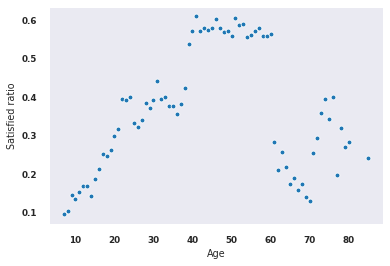

In [32]:
# Plot Satisfaction ratio over age
sns.scatterplot(x='Age', y='Satisfied ratio', data=df_age_sat_count)

Interesting! Let's plot that together with the histogram over age!

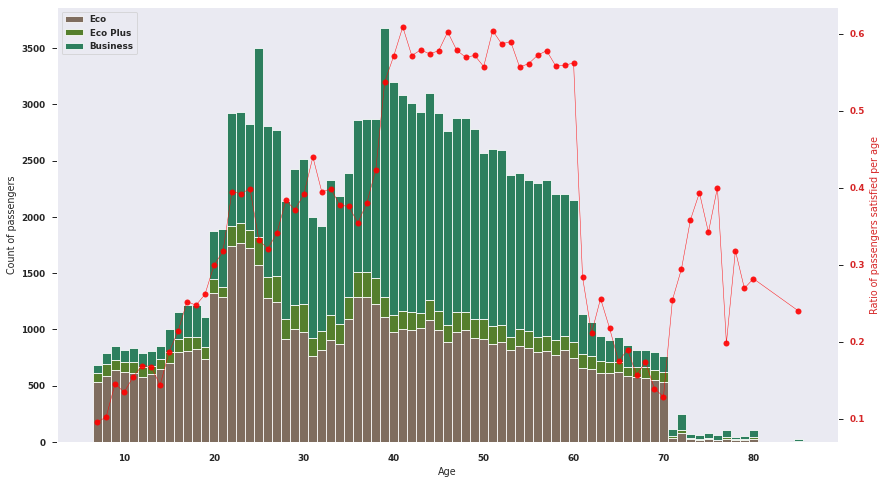

In [33]:
fig, ax = plt.subplots(figsize=(14,8))
# y-axis in bold
r#c('font', weight='bold')
 
# Values of each group
bars1 = df_age_class['Eco']
bars2 = df_age_class['Eco Plus']
bars3 = df_age_class['Business']

classes_names = ['Eco', 'Eco Plus', 'Business']
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = df_age_class['Age']
 
# Names of group and bar width
#names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)


plt.legend(classes_names,loc=2)
# Custom X axis
plt.ylabel('Count of passengers')
plt.xlabel("Age")

ax2 = ax.twinx()
color = 'tab:red'
ax2.plot(df_age_sat_count['Age'],
         df_age_sat_count['Satisfied ratio'],
         marker='.',
         markersize=12,
         color='red',
         linewidth=.5,
         alpha=0.9,
        )
#sns.regplot(x='Age', y='sat_ratio', data=df_sat_age, ax=ax2, color='red', fit_reg=False, line_kws={'lw': 2})
ax2.set_ylabel('Ratio of passengers satisfied per age', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# Show graphic
plt.show()

## Ratings for age category

In [34]:
# Define a list that contains all rating categories

rating_cats_t = ['Inflight wifi service',
                 'Departure/Arrival time convenient',
                 'Ease of Online booking',
                 'Gate location',
                 'Food and drink',
                 'Online boarding',
                 'Seat comfort',
                 'Inflight entertainment',
                 'On-board service',
                 'Leg room service',
                 'Baggage handling',
                 'Checkin service',
                 'Inflight service',
                 'Cleanliness',
                ]

In [35]:
# Collect all df's for the age categories in a list
frames = [df_age1, df_age2, df_age3, df_age4, df_age5]

# Define a list of strings for the age categories
age_categories =['0-18',
                 '19-25',
                 '26-40',
                 '41-60',
                 '61-85',
                ]
# Setting up a data frame, which contains the categories as columns, and the age groups as rows. The values
# shall be the ratings means.
df_ratings_mean = pd.DataFrame(columns=rating_cats_t)
for frame in frames:
    df_ratings_mean = df_ratings_mean.append(frame[rating_cats_t].mean(), ignore_index=True)

df_ratings_mean_t = df_ratings_mean.T.reset_index().rename(columns={'index':'category',
                                                                    0:'0-18',
                                                                    1:'19-25',
                                                                    2: '26-40',
                                                                    3: '41-60',
                                                                    4:'61-85',
                                                                   })

df_ratings_mean_t = df_ratings_mean_t.set_index('category')
df_ratings_mean_t = df_ratings_mean_t.reindex(['Baggage handling',
                                               'Checkin service',
                                               'Cleanliness',
                                               'Departure/Arrival time convenient',
                                               'Ease of Online booking',
                                               'Food and drink',
                                               'Gate location',
                                               'Inflight entertainment',
                                               'Inflight service',
                                               'Inflight wifi service',
                                               'Leg room service',
                                               'On-board service',
                                               'Online boarding',
                                               'Seat comfort',
                                                 ])
df_ratings_mean_t = df_ratings_mean_t.reset_index()
df_ratings_mean_t.head()

,category,0-18,19-25,26-40,41-60,61-85
0,Baggage handling,3.686186,3.690039,3.641164,3.655205,3.314965
1,Checkin service,3.217730,3.238084,3.252078,3.414751,3.162823
2,Cleanliness,3.054115,3.166970,3.265805,3.425360,3.096436
3,Departure/Arrival time convenient,3.333756,2.772527,2.990379,3.085488,3.351303
4,Ease of Online booking,2.591461,2.755701,2.745228,2.823414,2.637117


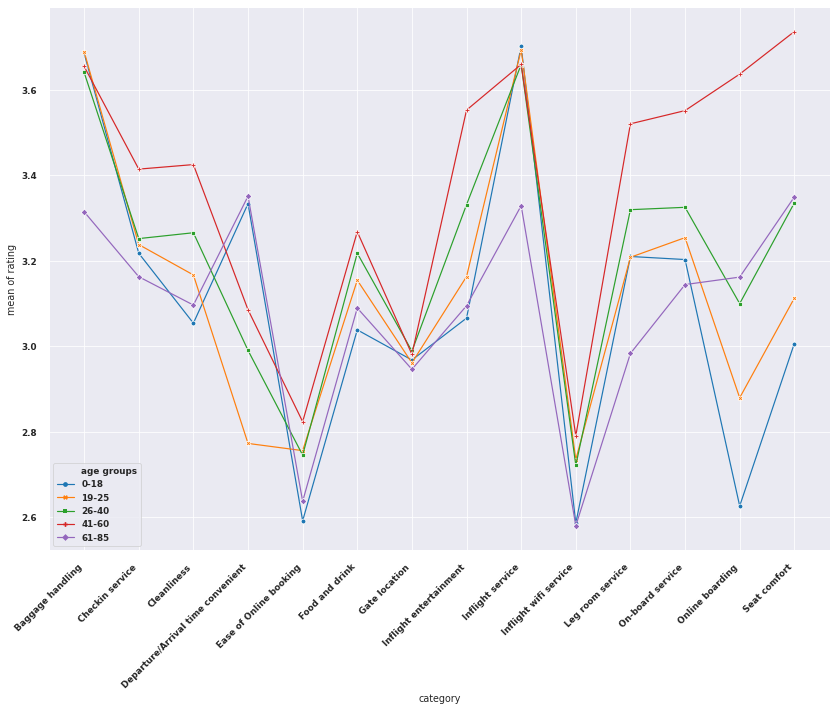

In [36]:
fig, ax = plt.subplots(figsize=(14,10))

data = pd.melt(df_ratings_mean_t, ['category'])
data = data.rename(columns={'value':'mean', 'variable':'age groups'})
    
ax = sns.lineplot(x='category',
                  y='mean',
                  hue='age groups', 
                  data=data,
                  markers=True,
                  dashes=False,
                  style='age groups',
                  err_style='band',
                  ci=95,
                 )
ax.set_ylabel('mean of rating')
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
ax.grid(True)
plt.legend(title='')

# TODO plot confidence intervals /errors into this plot, to make a statement if differences in the mean between
# the age groups are significant

# 3. Statistical Analysis

## Checking for correlation

In [37]:
# Function which plots a correlation heatmap (might come in handy later)

def plot_corr_heatmap(df, show_above=0, show_only_half=False):
    df_corr = df.corr()
    
    if show_only_half:
        # Creating mask to show only lower left part of the main diagonale of the correlation matrox
        mask = np.zeros_like(df_corr)
        mask[np.triu_indices_from(mask)] = True
    else:
        mask = np.zeros_like(df_corr)
        
    # Plot
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(20, 12))
        ax = sns.heatmap(round(df_corr[abs(df_corr) >=show_above],2),
                         mask=mask,
                         cmap='RdYlGn_r',
                         annot=True,
                         cbar_kws={'label': 'Pearson correlation coefficient',
                                  'ticks': [-0.4, 0, 0.4, 0.8]
                                  },
                        )
    
    # Setting tick-labels
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)
    ax.figure.axes[-1].yaxis.label.set_size(20)

    # Manipulating colorbar
    cbar_axes = ax.figure.axes[-1]
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

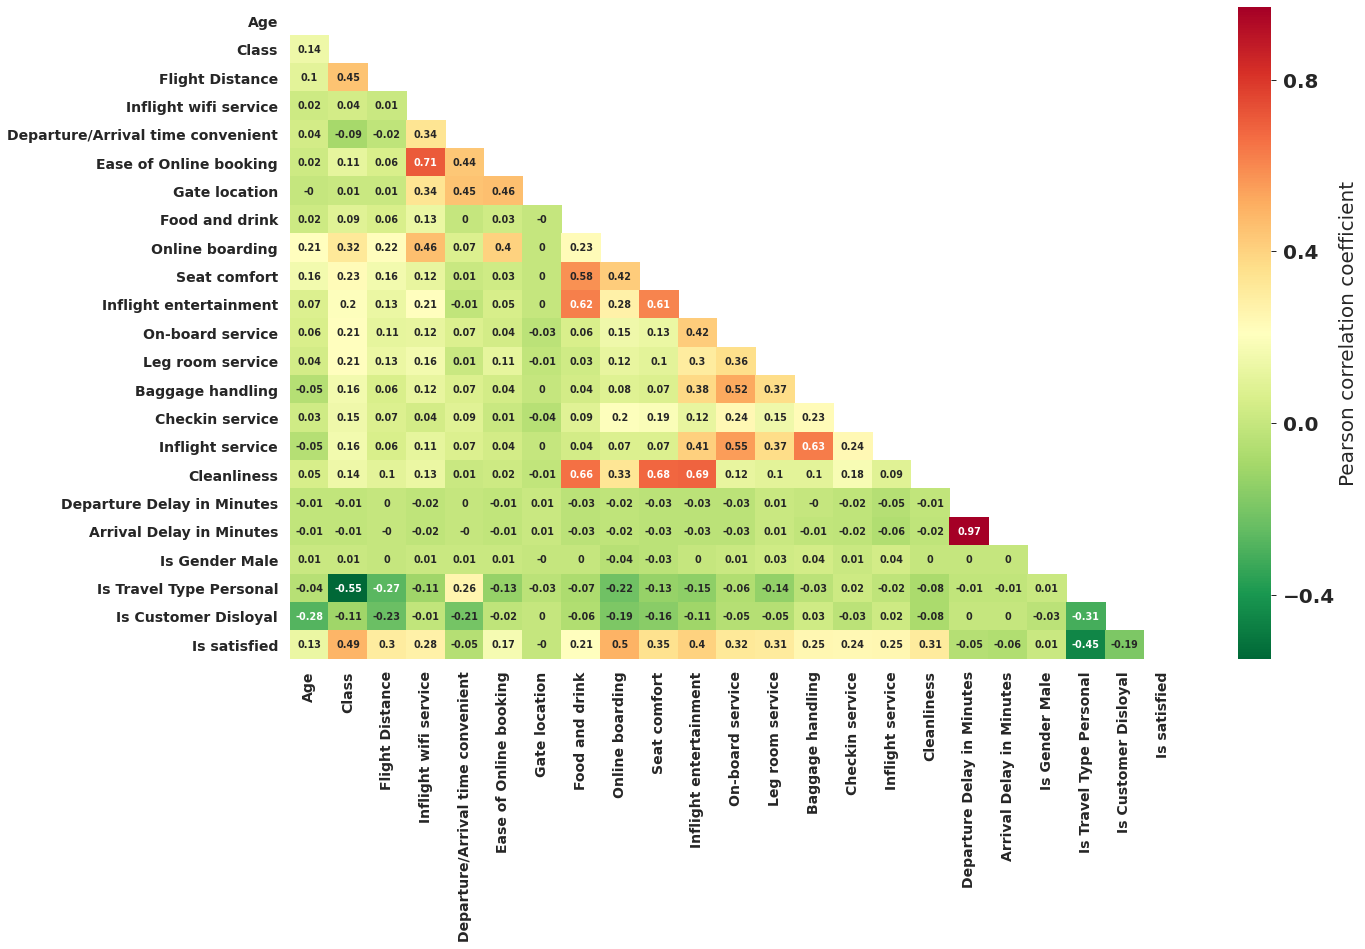

In [38]:
# Plot all correlations

df_to_corr = df.drop('id',axis=1)
plot_corr_heatmap(df_to_corr, show_only_half=True)


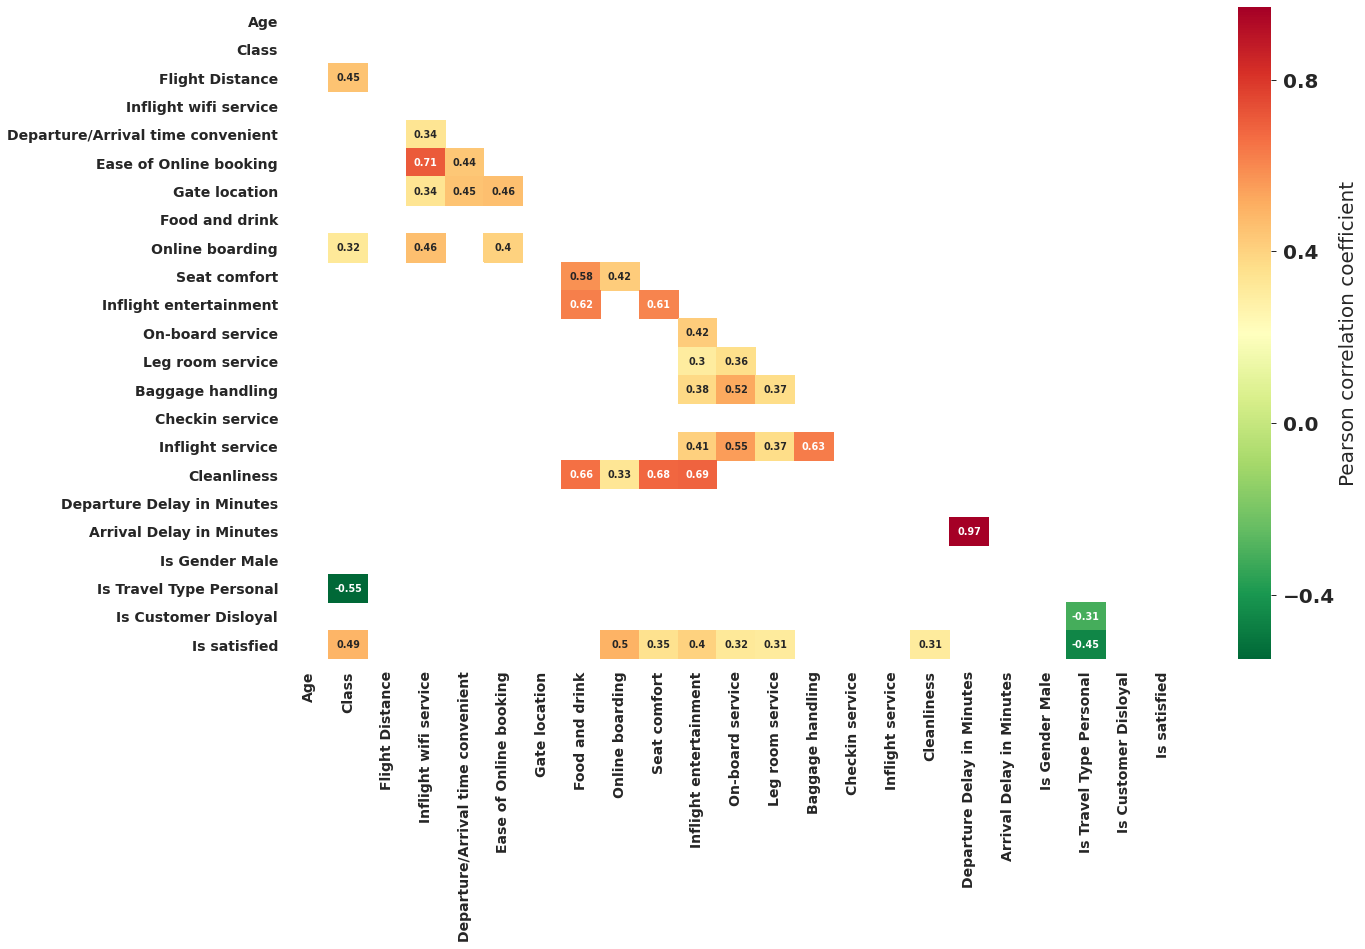

In [39]:
# Show only those above 0.3

plot_corr_heatmap(df_to_corr, show_above=0.3, show_only_half=True)

# What is the nature of the positive correlation between 'In Flight WiFi Service' and 'Ease of Online Booking'?

is it strong over all age groups?

In [40]:
# Function which returns a list of correlations between categories as they develop over the age groups
age_groups = ['0 - 18','19 - 25','26 - 40','41 - 60','61 - 85']
frames = [df_age1, df_age2, df_age3, df_age4, df_age5]
def df_corr_over_age(var1,var2):
    return pd.DataFrame({'age group':age_groups,
                         'corr_coeff':[frame[[var1,var2]].corr().iloc[0][1] for frame in frames],
                        }) 

In [41]:
def plot_corr_over_agegroups(cat1, cat2):
    fig, ax = plt.subplots(figsize=(6,6))

    # Only 4 ticks on the y-axis
    plt.locator_params(axis='y', nbins=4)

    df_online = df_corr_over_age(cat1,cat2)
    df_online.plot(x='age group',
                   y='corr_coeff',
                   kind='line',
                   c='r',
                   marker='.',
                   ms=15,
                   ax=ax,
                  )

    ax.set_ylabel('Pearson correlation coefficient')
    ax.set_title(r'Correlation between $\bf{{{v1}}}$ and $\bf{{{v2}}}$'.format(v1=cat1,v2=cat2) +'\n' +
                 'over the age groups')
    ax.legend('')

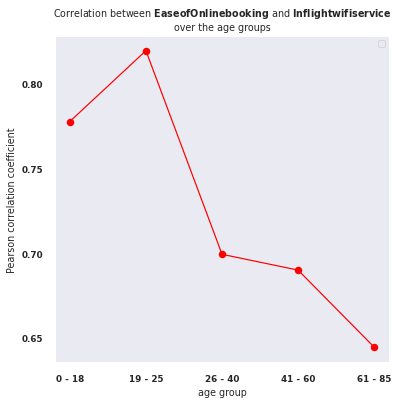

In [42]:
c1 = 'Ease of Online booking'
c2 = 'Inflight wifi service'
plot_corr_over_agegroups(c1, c2)

correlation gets weaker over the age groups

In [43]:
rating_cats_t = ['Is satisfied','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

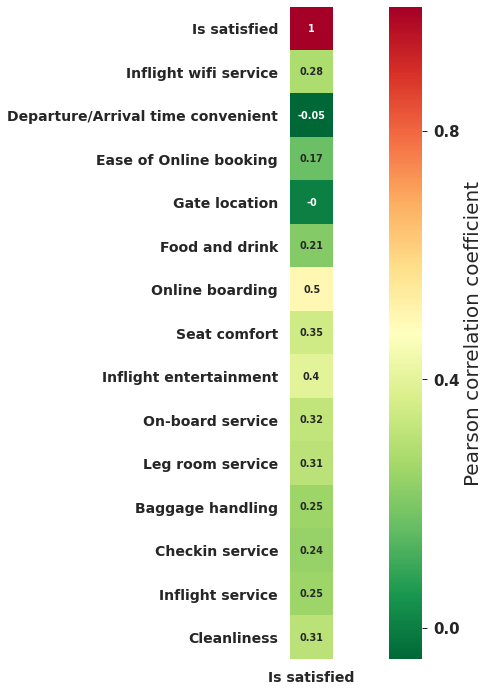

In [44]:
df_corr_rating = df[rating_cats_t].corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12))
    ax = sns.heatmap(round(df_corr_rating[['Is satisfied']],2),
                     square=True,
                     cmap='RdYlGn_r',
                     annot=True,
                     cbar_kws={'label': 'Pearson correlation coefficient',
                              'ticks': [-0.4, 0, 0.4, 0.8]
                              },
                    )
cbar_axes = ax.figure.axes[-1]
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)
ax.figure.axes[-1].yaxis.label.set_size(20)

cbar = ax.collections[0].colorbar

# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)

How does the correlation of these categories with Satisfaction evolve over the age groups?

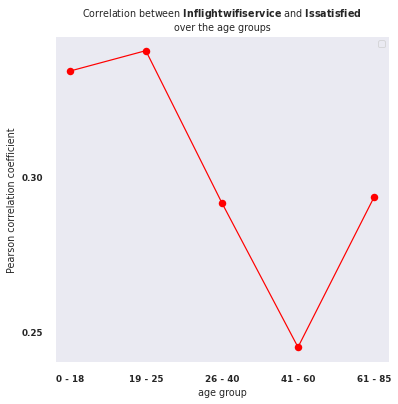

In [45]:
c1 = 'Inflight wifi service'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

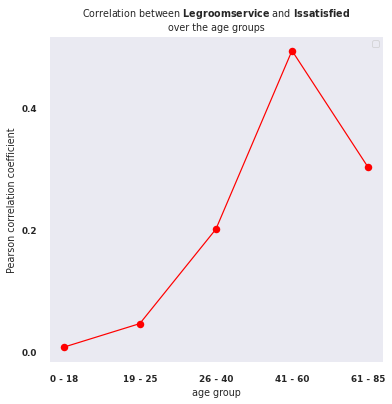

In [46]:
c1 = 'Leg room service'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

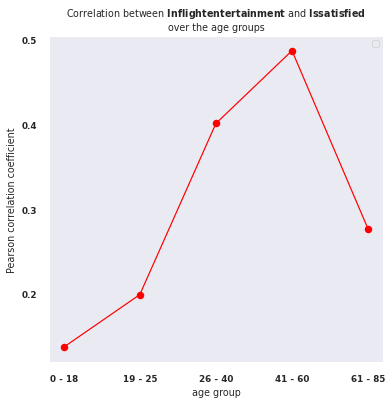

In [47]:
c1 = 'Inflight entertainment'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

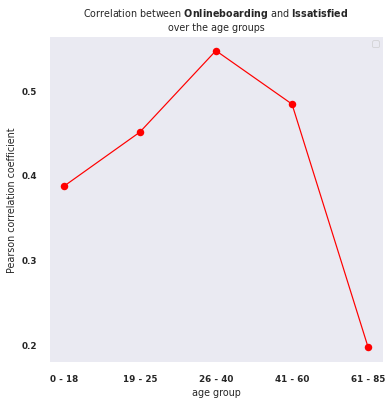

In [48]:
c1 = 'Online boarding'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

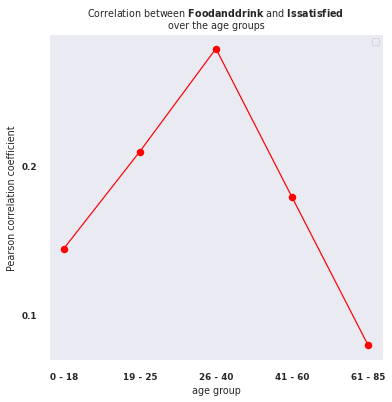

In [49]:
c1 = 'Food and drink'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

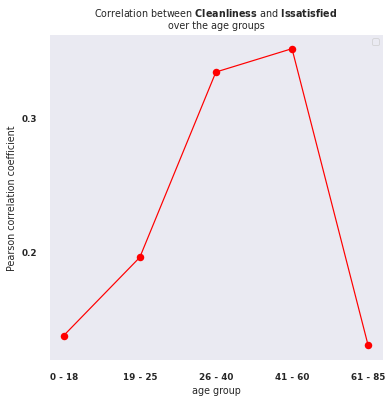

In [50]:
c1 = 'Cleanliness'
c2 = 'Is satisfied'
plot_corr_over_agegroups(c1, c2)

Plot them all together

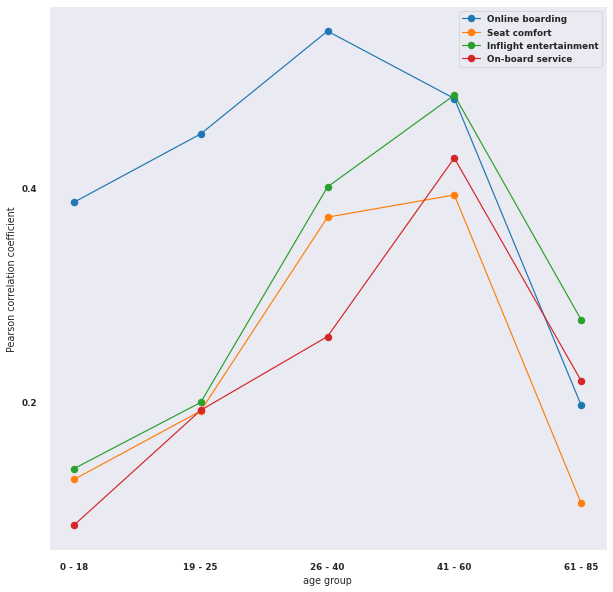

In [51]:
rating_cats_highest = ['Online boarding',
                       'Seat comfort',
                       'Inflight entertainment',
                       'On-board service',
                      ]

fig, ax = plt.subplots(figsize=(10,10))

# Only 4 ticks on the y-axis
plt.locator_params(axis='y', nbins=4)

for cat in rating_cats_highest:
    df_corr_over_age('Is satisfied',cat).plot(x='age group',                      
                                              y='corr_coeff',                      
                                              kind='line',               
                                              marker='.',
                                              ms=15,
                                              ax=ax,                                    
                                              label=cat,
                                              )

_ = ax.set_ylabel('Pearson correlation coefficient')

A few thoughts on these correlation plots:
One might be tempted to interpret these plots in a way that with growing age, these categories provide flight satisfaction for a passenger, and after the age of around 60, online boarding, seat comfort, inflight entertainment and onboard service decrease in their ability to cause satisfaction in a passenger. This might be an intuitively reasonable interpretation.

Nevertheless, calculating and plotting correlations can give only hints towards more significant relationships between variables, the explanatory power with regards to significance (is this correlation real or due to randomness?) of correlations is limited. A more thorough analysis using regression (see below) is necessary to make statements in that direction.

In [52]:
# Use only the highest correlated categories
#together
df_ratings_h = df[rating_cats_highest]

# Create dummie variables from those
dummie_var_cats = ['Online boarding',
                   'Seat comfort',
                   'Inflight entertainment',
                   'On-board service',
                  ]

df_ratings_h_d = pd.get_dummies(df_ratings_h,
                                columns=dummie_var_cats,
                                drop_first=True,
                               )

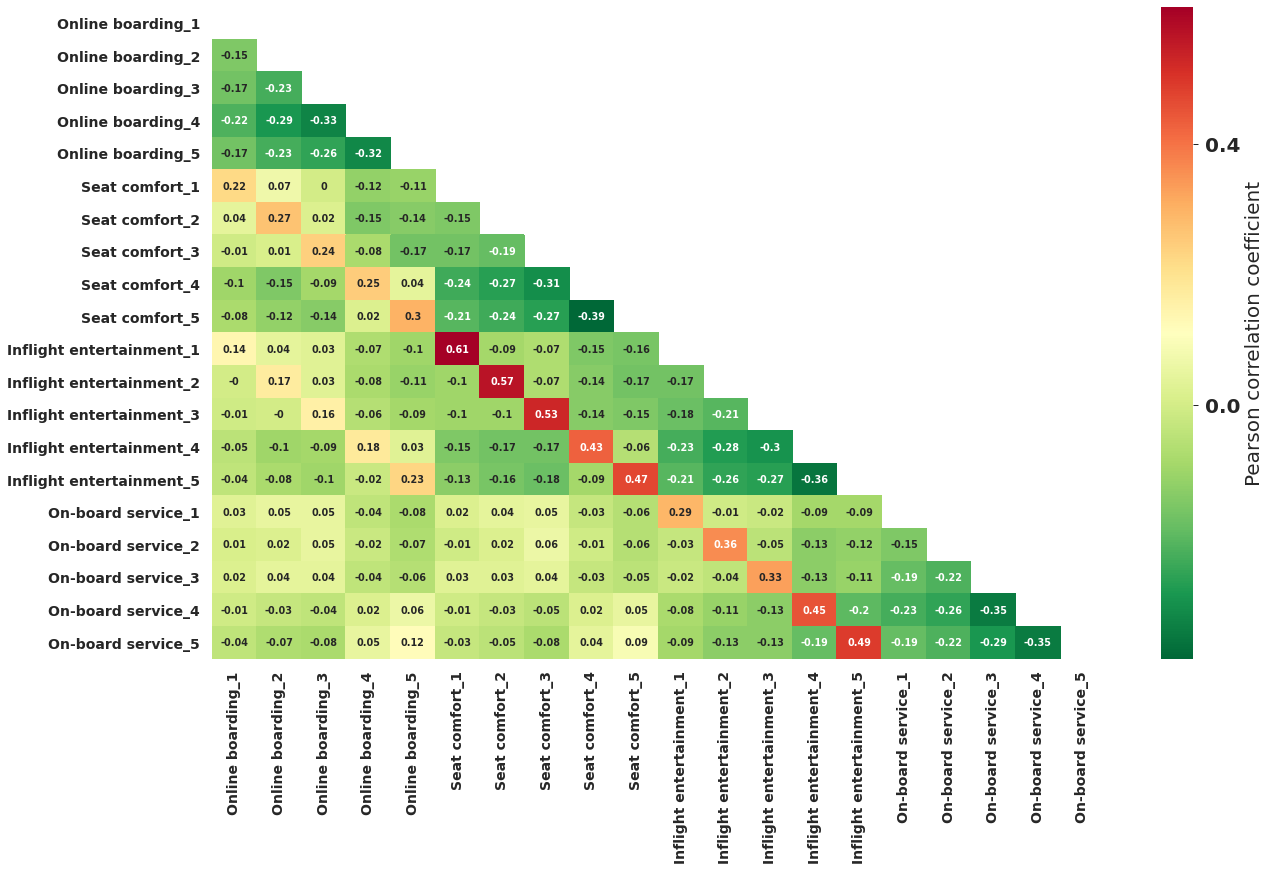

In [56]:
plot_corr_heatmap(df_ratings_h_d, show_only_half=True)

One observation here:

* There seems to be increased correlation between ratings of equal values, which means passengers who rate all the same on their whole survey sheet

## Linear Regression

**Which variables contribute most to 'is satisfied'?**

that is, where would you start improving first as an airline, if you had e.g. limited ressources (time, money), if your KPI was passenger satisfaction?

Let's try a linear regression, with the passenger **satisfaction** being the **dependent variable**, and let be the following bold printed variables be the independent variables:

* **'Age'**
* 'Class'
* 'Flight Distance'
* 'Inflight wifi service'
* 'Departure/Arrival time convenient'
* 'Ease of Online booking'
* 'Gate location'
* 'Food and drink'
* **'Online boarding'**
* **'Seat comfort'**
* **'Inflight entertainment'**
* **'On-board service'**
* 'Leg room service'
* 'Baggage handling'
* 'Checkin service'
* 'Inflight service'
* 'Cleanliness'
* 'Departure Delay in Minutes'
* 'Arrival Delay in Minutes'
* 'Is Gender Male'
* 'Is Travel Type Personal'
* 'Is Customer Disloyal'

In [54]:
# Dangerous and not-best-practice step ahead! We can concatenate because we know we didn't change the order
# of rows. Better practice would be to construct the dummy-variable-df straight from the original df.
df_ratings_h_age = pd.concat([df_ratings_h, df[['Is satisfied','Age']]], axis=1)
df_ratings_h_age.head()

,Online boarding,Seat comfort,Inflight entertainment,On-board service,Is satisfied,Age
0,4,3,5,5,1,52
1,4,5,4,4,1,36
2,2,2,2,4,0,20
3,4,4,1,1,1,44
4,1,2,2,2,1,49


In [55]:
y = df_ratings_h_age['Is satisfied']
X = df_ratings_h_age[['Online boarding',
                      'Seat comfort',
                      'Inflight entertainment',
                      'On-board service',
                      'Age',
                     ]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Is satisfied   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 1.384e+04
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:03:46   Log-Likelihood:                -65137.
No. Observations:              129487   AIC:                         1.303e+05
Df Residuals:                  129481   BIC:                         1.303e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5838      0.005   -121.844      0.000      -0.593      -0.574
Online boarding            0.1469      0.001    159.086      0.000       0.145       0.149
Seat comfort               0.0160      0.001     13.819      0.000       0.014       0.018
Inflight entertainment     0.0679      0.001     58.069      0.000       0.066       0.070
On-board service           0.0683      0.001     70.205      0.000       0.066       0.070
Age                        0.0007   7.56e-05      8.859      0.000       0.001       0.001
==============================================================================
Omnibus:                     2034.386   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1932.370
Skew:                           0.265   Prob(JB):                         0.00
Kurtosis:                       2.721   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Conclusion and ToDo

* The calculated multiple linear regression model is of medium quality with regards to how much of the variance in the data it is able to explain. In fact only a third of the variability (*R²=0.348*) is explained by the model. Those values which can be explained by the model though are described fairly well. Each independent variable, **Online Boarding**, **Seat Comfort**, **Inflight Entertainment**, **On-board service** as well as **Age** do have a significant effect beyond just randomness (p-values all < 0.000) on the dependent variable **Is satisfied**. Although for example the passengers Age barely has any effect, an increase in one unit of rating (out of 5) according to the model results in ca. 15% passenger satisfaction. Here the model assumes Satisfaction not as discrete variable in the same way in which the data are imported (satisfied = {1,0}), but as a continous variable from 0 to 1 (0% and 100% respectively). The legitimacy of that assumption can be put to question though, since it is unclear how passengers whould have rated satisfaction if they really were able to rate it from 0 to 100%.

* The sudden jumps in satisfaction at certain ages could indicate, that there's an external effect at work, which is related to satisfaction. With regards to model significance and accuracy it could be therefore promising to calculate the OLS for the different age groups which set themselves apart from each other by these sudden jumps. A recommendation informed by such an analysis could pose valuable information for PR and marketing departments within an airline.

* Do passengers rate their experiences differently depending on which class they fly? One could make an OLS for each of the categories here as well